In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
plt.rcParams['figure.figsize'] = 15, 10

# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
	torchvision.transforms.ToTensor(),
	torchvision.transforms.Normalize((0.5), (0.5))
])

# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
	root="./MNIST/train", train=True,
	transform=torchvision.transforms.ToTensor(),
	download=True)

test_dataset = torchvision.datasets.MNIST(
	root="./MNIST/test", train=False,
	transform=torchvision.transforms.ToTensor(),
	download=True)



# Creating Dataloaders from the
# training and testing dataset
train_loader = torch.utils.data.DataLoader(
	train_dataset, batch_size=256)
test_loader = torch.utils.data.DataLoader(
	test_dataset, batch_size=256)

# # Printing 25 random images from the training dataset
# random_samples = np.random.randint(
# 	1, len(train_dataset), (25))

# for idx in range(random_samples.shape[0]):
# 	plt.subplot(5, 5, idx + 1)
# 	plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
# 	plt.title(train_dataset[idx][1])
# 	plt.axis('off')

# plt.tight_layout()
# plt.show()



In [2]:
# Creating a DeepAutoencoder class
class DeepAutoencoder(torch.nn.Module):
	def __init__(self):
		super().__init__()		
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 256),
			torch.nn.ReLU(),
			torch.nn.Linear(256, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 10)
		)
		
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(10, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 256),
			torch.nn.ReLU(),
			torch.nn.Linear(256, 28 * 28),
			torch.nn.Sigmoid()
		)

	def encode(self, x):
		return self.encoder(x)

	def decode(self, x):
		return self.decoder(x)

	def forward(self, x):
		encoded = self.encode(x)
		decoded = self.decode(encoded)
		return decoded

# Instantiating the model and hyperparameters
model = DeepAutoencoder()
m = model.to('cuda')
criterion = torch.nn.MSELoss()
num_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [3]:
# List that will store the training loss
train_loss = []

# Dictionary that will store the
# different images and outputs for
# various epochs
outputs = {}

batch_size = len(train_loader)

b2 = []

for batch in train_loader:
			
		# Loading image(s) and
		# reshaping it into a 1-d vector
		img, _ = batch
		img = img.to('cuda')
		b2.append(img)
# Training loop starts
for epoch in range(num_epochs):
	
	# Initializing variable for storing
	# loss
	running_loss = 0
	
	# Iterating over the training dataset
	for batch in b2:
			
		# Loading image(s) and
		# reshaping it into a 1-d vector
		img = batch
		#img = img.to('cuda')
		img = img.reshape(-1, 28*28)
		
		# Generating output
		out = model(img)
		
		# Calculating loss
		loss = criterion(out, img)
		
		# Updating weights according
		# to the calculated loss
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		
		# Incrementing loss
		running_loss += loss.item()
	
	# Averaging out loss over entire batch
	running_loss /= batch_size
	train_loss.append(running_loss)
	print(f"{running_loss} {epoch}")
	# Storing useful images and
	# reconstructed outputs for the last batch
	outputs[epoch+1] = {'img': img, 'out': out}





0.0731554293727621 0
0.049405177032693905 1
0.03732737255223254 2
0.0306656604196797 3
0.02766365076791733 4
0.025692233601783184 5
0.02438584937060133 6
0.023180211604909694 7
0.02205937128276267 8
0.02116714582005714 9
0.020325057145128857 10
0.01953636630576976 11
0.018815954552685962 12
0.01826694725834309 13
0.017820542325523304 14
0.017432757780114386 15
0.01708082043902671 16
0.016713192916296898 17
0.01636598240584135 18
0.01604541555998173 19
0.01575751765135755 20
0.01551142470475207 21
0.015301640331745147 22
0.015197788329517587 23
0.01503003670417882 24
0.014810354262590409 25
0.014641475689379459 26
0.014518343776147417 27
0.014373914818180369 28
0.01420378112333252 29
0.014036853817549157 30
0.013897347846563827 31
0.01377134205416796 32
0.013662657288319252 33
0.013559694667445853 34
0.013467863047535115 35
0.013385193006313861 36
0.013307611604637289 37
0.013237164339962158 38
0.013180483679505105 39
0.013155667547215807 40
0.01312406156608399 41
0.013085845806338686 4

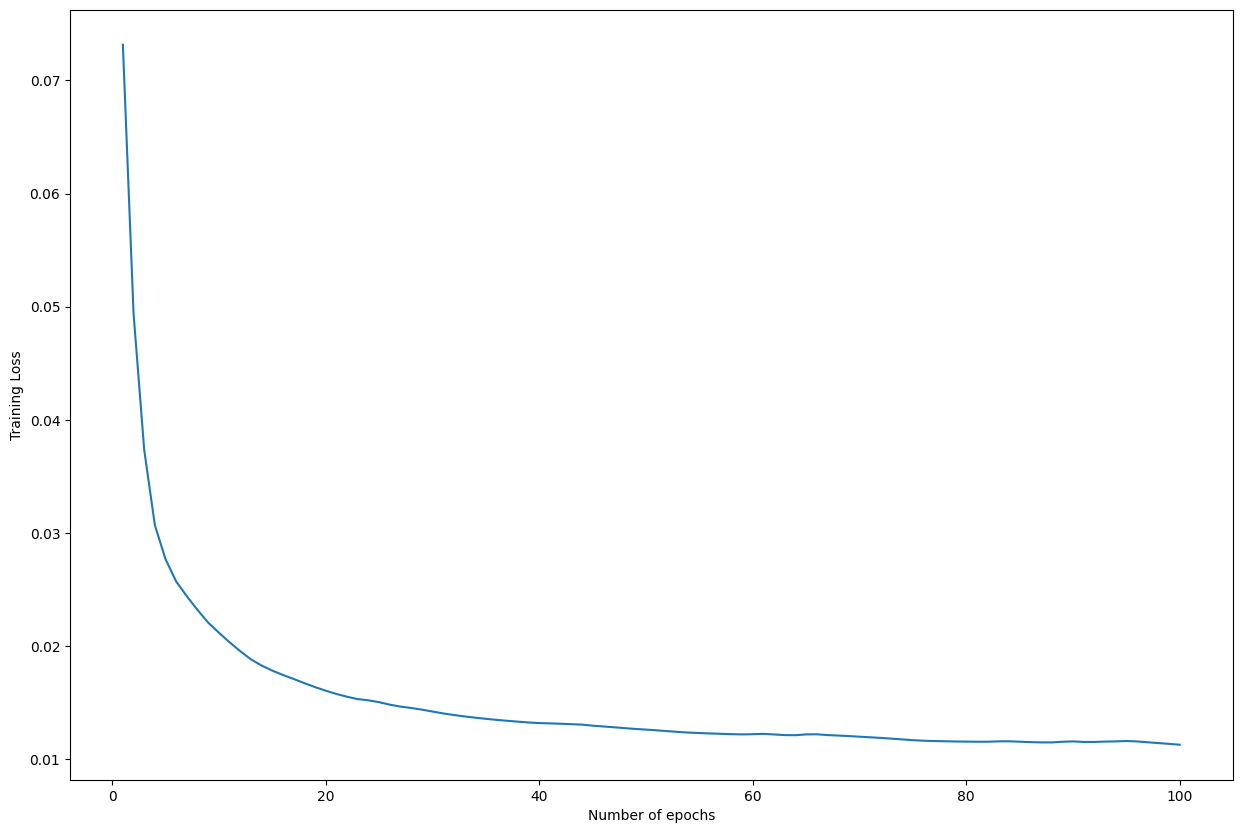

In [4]:
# Plotting the training loss
plt.plot(range(1,num_epochs+1),train_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss")
plt.show()

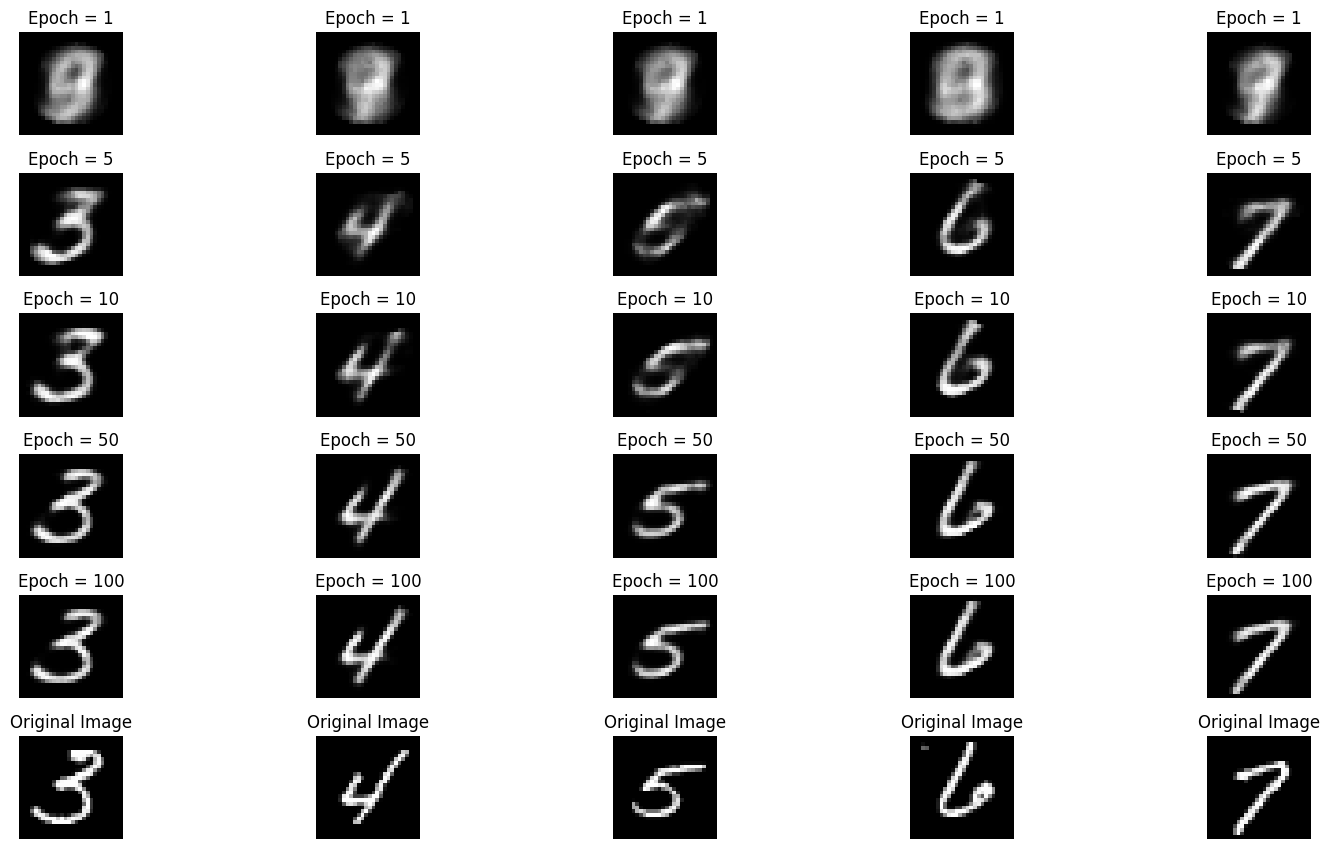

In [5]:
# Plotting is done on a 7x5 subplot
# Plotting the reconstructed images

# Initializing subplot counter
counter = 1

# Plotting reconstructions
# for epochs = [1, 5, 10, 50, 100]
epochs_list = [1, 5, 10, 50, 100]

# Iterating over specified epochs
for val in epochs_list:
	
	# Extracting recorded information
	temp = outputs[val]['out'].detach().cpu().numpy()
	title_text = f"Epoch = {val}"
	
	# Plotting first five images of the last batch
	for idx in range(5):
		plt.subplot(7, 5, counter)
		plt.title(title_text)
		plt.imshow(temp[idx].reshape(28,28), cmap= 'gray')
		plt.axis('off')
		
		# Incrementing the subplot counter
		counter+=1

# Plotting original images

# Iterating over first five
# images of the last batch
for idx in range(5):
	
	# Obtaining image from the dictionary
	val = outputs[10]['img'].cpu()
	
	# Plotting image
	plt.subplot(7,5,counter)
	plt.imshow(val[idx].reshape(28, 28),
			cmap = 'gray')
	plt.title("Original Image")
	plt.axis('off')
	
	# Incrementing subplot counter
	counter+=1

plt.tight_layout()
plt.show()


RuntimeError: shape '[28, 28]' is invalid for input of size 10

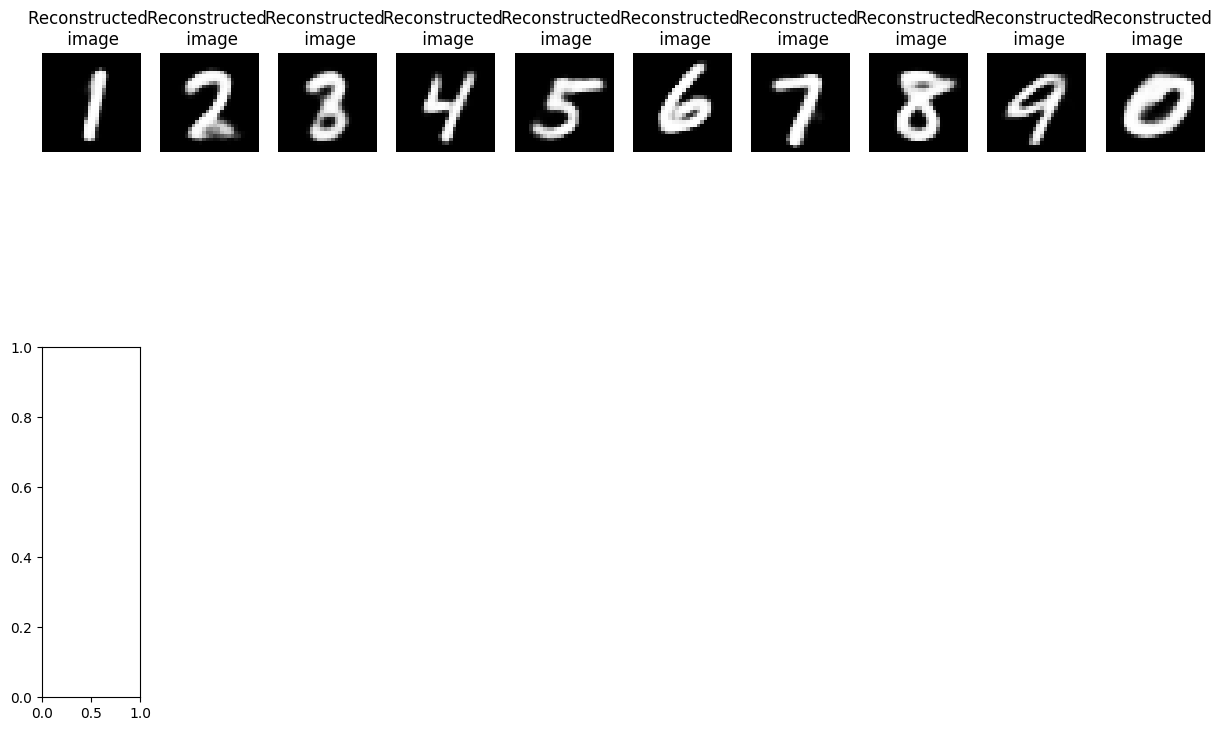

In [9]:
# Dictionary that will store the different
# images and outputs for various epochs
outputs = {}

# Extracting the last batch from the test
# dataset
img, _ = list(test_loader)[-1]

# Reshaping into 1d vector
img = img.reshape(-1, 28 * 28)
img = img.to('cuda')
# Generating output for the obtained
# batch

encoded = model.encode(img)

decoded = model.decode(encoded)

out = decoded

# Storing information in dictionary
outputs['img'] = img
outputs['out'] = decoded

# Plotting reconstructed images
# Initializing subplot counter
counter = 1
val = outputs['out'].detach().cpu().numpy()

# Plotting first 10 images of the batch
for idx in range(10):
	plt.subplot(2, 10, counter)
	plt.title("Reconstructed \n image")
	plt.imshow(val[idx].reshape(28, 28), cmap='gray')
	plt.axis('off')

	# Incrementing subplot counter
	counter += 1

# Plotting original images

# Plotting first 10 images
for idx in range(10):
    val = outputs['img']
    plt.subplot(2, 10, counter)
    plt.imshow(val[idx].cpu().reshape(28, 28), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

	# Incrementing subplot counter
    counter += 1

plt.tight_layout()
plt.show()
